In [16]:
import os
import glob
import numpy as np
import pandas as pd
import copy
import mne
from fooof import FOOOF, FOOOFGroup
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_localization = pd.read_csv('/Volumes/Nexus/Users/zouj/sEEG_data/electrode-localizations.tsv', delimiter='\t')\
    [['Subject', 'label', 'electrode', 'is_thalamic', 'is_cortical']]

In [2]:
spectra_file_names = glob.glob('/Volumes/Nexus/Users/zouj/sEEG_data/spectra/*')

In [3]:
spectra_file_names

['/Volumes/Nexus/Users/zouj/sEEG_data/spectra/sub-EM1021_session-EMU_task-resting_run-01-spectrum.h5',
 '/Volumes/Nexus/Users/zouj/sEEG_data/spectra/sub-EM1021_session-EMU_task-resting_run-02-spectrum.h5',
 '/Volumes/Nexus/Users/zouj/sEEG_data/spectra/sub-EM1021_session-EMU_task-resting_run-03-spectrum.h5',
 '/Volumes/Nexus/Users/zouj/sEEG_data/spectra/sub-EM1023_ses-EMU_task-resting_run-02-spectrum.h5',
 '/Volumes/Nexus/Users/zouj/sEEG_data/spectra/sub-EM1023_ses-EMU_task-resting_run-01-spectrum.h5',
 '/Volumes/Nexus/Users/zouj/sEEG_data/spectra/sub-EM1029_ses-EMU_task-resting_run-01-spectrum.h5',
 '/Volumes/Nexus/Users/zouj/sEEG_data/spectra/EM1002_ses-EMU_task-resting_run-1_1-spectrum.h5',
 '/Volumes/Nexus/Users/zouj/sEEG_data/spectra/EM1002_ses-EMU_task-resting_run-1_2-spectrum.h5',
 '/Volumes/Nexus/Users/zouj/sEEG_data/spectra/EM1035_ses-EMU_task-resting_run-1-spectrum.h5',
 '/Volumes/Nexus/Users/zouj/sEEG_data/spectra/sub-EM1061_ses-EMU_task-resting_run-01_ieeg-spectrum.h5',
 '/V

# Full Spectrum
* spectral drop off ~ 400 hz
*

In [5]:
subj_1021_spectra = mne.time_frequency.read_spectrum(
    '/Volumes/Nexus/Users/zouj/sEEG_data/spectra/sub-EM1021_session-EMU_task-resting_run-01-spectrum.h5'
)

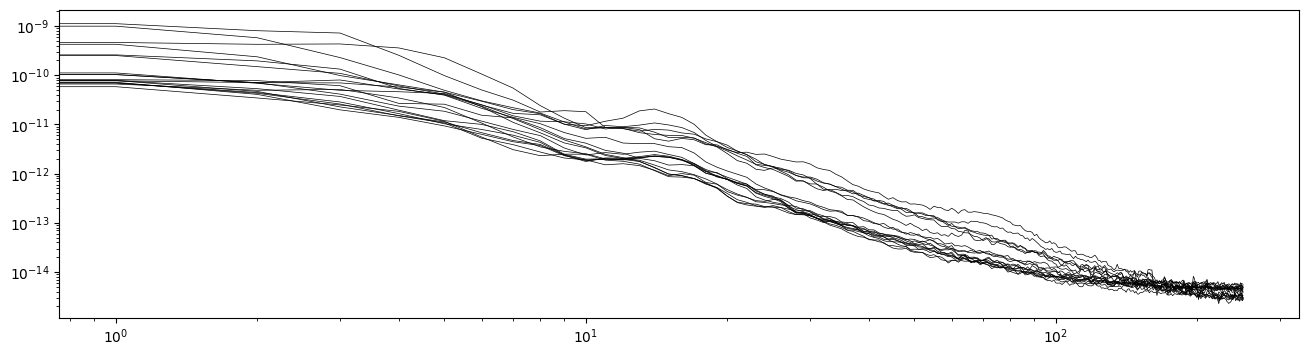

In [28]:
plt.figure(figsize=(16, 4))
plt.loglog(subj_1021_spectra.freqs[:251], 
           subj_1021_spectra[:,:251].T,
           color = 'k', linewidth = 0.5)

/var/folders/3b/c572vxrx1rddt5284f3d5zh80000gn/T/ipykernel_24336/1925405463.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  subj_1021_spectra.plot()
/Users/jasminezou/Projects/mne-python/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


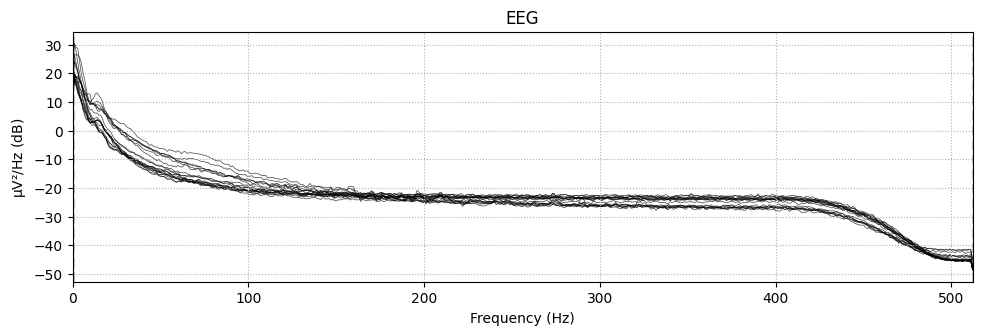

In [14]:
subj_1021_spectra.plot()

/var/folders/3b/c572vxrx1rddt5284f3d5zh80000gn/T/ipykernel_24336/1801653364.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  subj_1021_spectra.plot(xscale = 'log')
/Users/jasminezou/Projects/mne-python/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


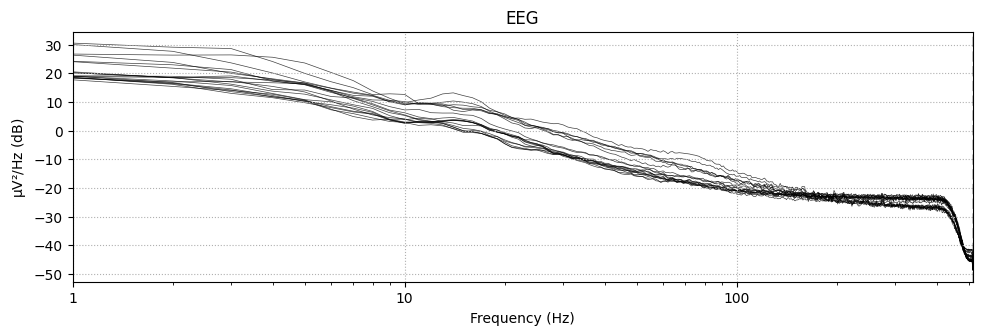

In [9]:
subj_1021_spectra.plot(xscale = 'log')

/var/folders/3b/c572vxrx1rddt5284f3d5zh80000gn/T/ipykernel_24336/1655883504.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  plot(xscale = 'log')
/Users/jasminezou/Projects/mne-python/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


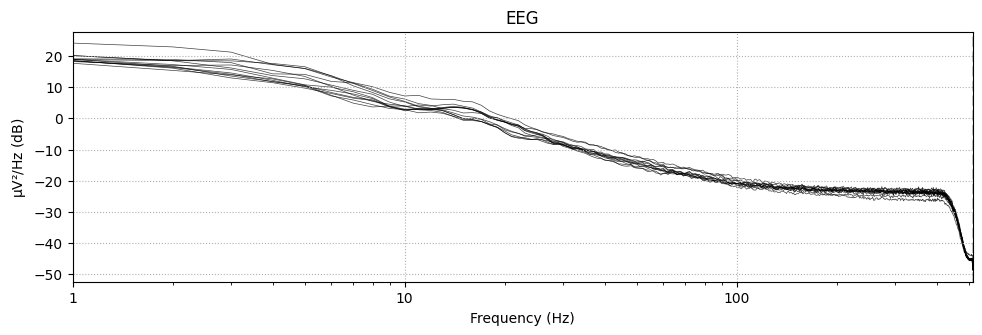

In [30]:
subj_1021_spectra.copy().pick([ch for ch in subj_1021_spectra.ch_names 
                               if ch in list(df_localization.query('Subject=="EM1021" & is_cortical==0 ')['label'])]).\
                                plot(xscale = 'log')

/var/folders/3b/c572vxrx1rddt5284f3d5zh80000gn/T/ipykernel_24336/3962058162.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  plot(xscale = 'log')
/Users/jasminezou/Projects/mne-python/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


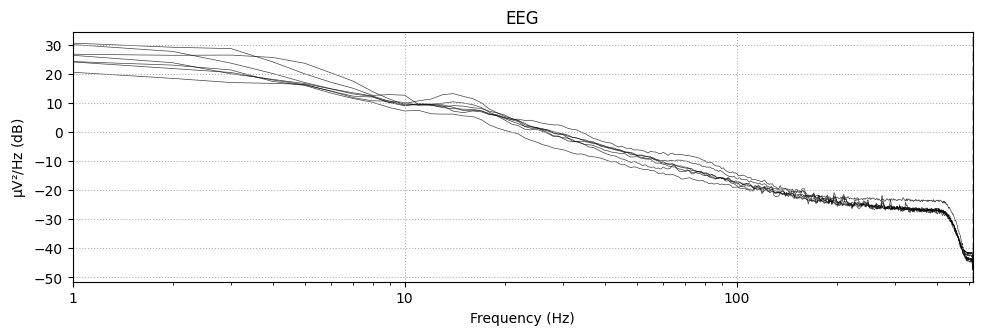

In [31]:
subj_1021_spectra.copy().pick([ch for ch in subj_1021_spectra.ch_names 
                               if ch in list(df_localization.query('Subject=="EM1021" & is_thalamic==0 ')['label'])]).\
                                plot(xscale = 'log')

In [10]:
subj_1023_spectra = mne.time_frequency.read_spectrum(
     '/Volumes/Nexus/Users/zouj/sEEG_data/spectra/sub-EM1023_ses-EMU_task-resting_run-02-spectrum.h5',
)

/var/folders/3b/c572vxrx1rddt5284f3d5zh80000gn/T/ipykernel_24336/3490708079.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  subj_1023_spectra.plot(xscale = 'log')
/Users/jasminezou/Projects/mne-python/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


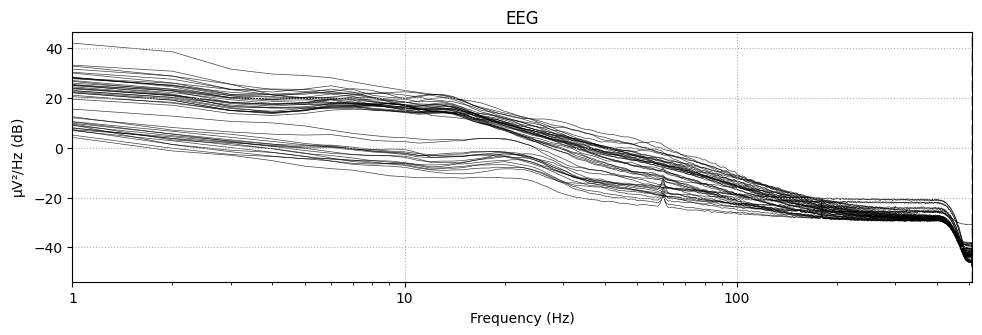

In [11]:
subj_1023_spectra.plot(xscale = 'log')

/var/folders/3b/c572vxrx1rddt5284f3d5zh80000gn/T/ipykernel_24336/3984582565.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  plot(xscale = 'log')
/Users/jasminezou/Projects/mne-python/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


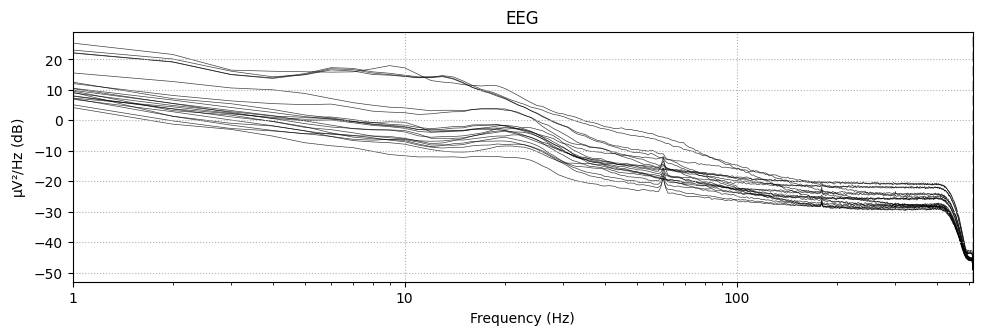

In [32]:
subj_1023_spectra.copy().pick([ch for ch in subj_1023_spectra.ch_names 
                               if ch in list(df_localization.query('Subject=="EM1023" & is_cortical==0 ')['label'])]).\
                                plot(xscale = 'log')

/var/folders/3b/c572vxrx1rddt5284f3d5zh80000gn/T/ipykernel_24336/4028381002.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  plot(xscale = 'log')
/Users/jasminezou/Projects/mne-python/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


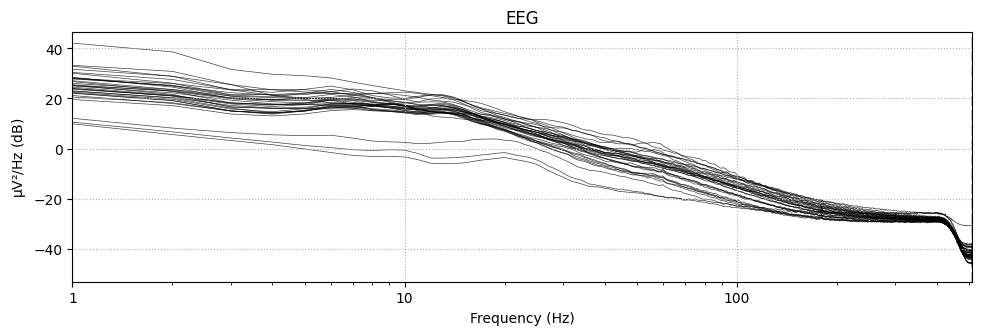

In [33]:
subj_1023_spectra.copy().pick([ch for ch in subj_1023_spectra.ch_names 
                               if ch in list(df_localization.query('Subject=="EM1023" & is_thalamic==0 ')['label'])]).\
                                plot(xscale = 'log')

In [29]:
df_localization.query('Subject=="EM1035"')

,Subject,label,electrode,is_thalamic,is_cortical
154,EM1035,RCM1,rcm,1,0
155,EM1035,RCM2,rcm,1,0
156,EM1035,RCM3,rcm,1,0
157,EM1035,RCM4,rcm,1,0
158,EM1035,RCM5,rcm,1,0
159,EM1035,RCM6,rcm,0,0
160,EM1035,RCM7,rcm,0,0
161,EM1035,RCM8,rcm,0,0
162,EM1035,RCM9,rcm,0,0
163,EM1035,RCM10,rcm,0,0
